## Domaci zadatak iz prepoznavanja oblika

### Zadatak 2.

### Uvoz neophodnih biblioteka

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.metrics import confusion_matrix
import seaborn as sns

### Generisanje odbiraka

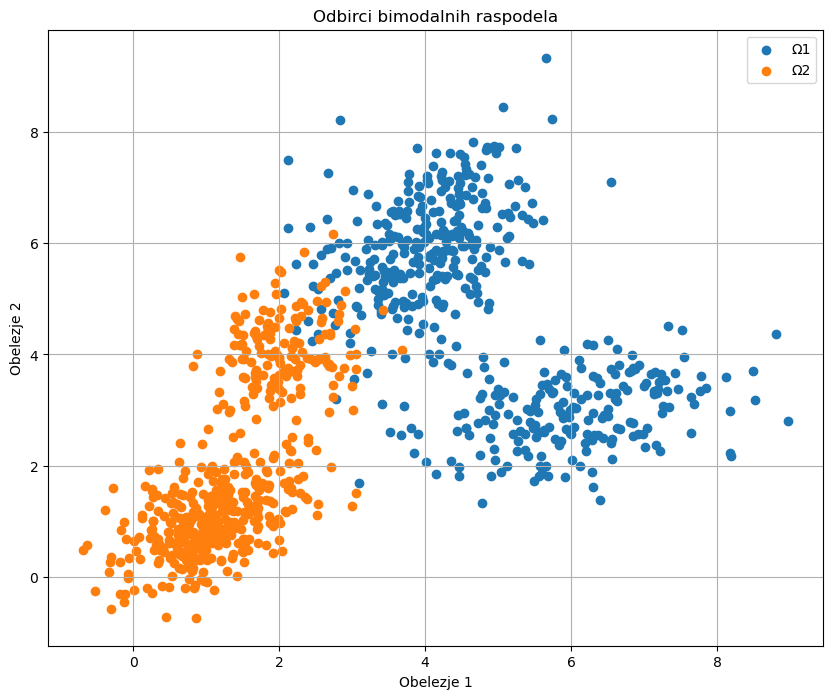

In [150]:
p11 = 0.6
p12 = 0.4
M11 = np.array([4,6]).reshape(-1,1)
M12 = np.array([6,3]).reshape(-1,1)
S11 = np.array([[0.6, 0.3],[0.3, 0.9]])
S12 = [[1.2, 0.2],[0.2, 0.4]]

p21 = 0.7
p22 = 0.3
M21 = np.array([1,1]).reshape(-1,1)
M22 = np.array([2,4]).reshape(-1,1)
S21 = np.array([[0.4, 0.2],[0.2, 0.4]])
S22 = np.array([[0.3, 0.1],[0.1, 0.5]])

N = 500

n11 = int(p11*N)
n12 = int(p12*N)
data11 = np.random.multivariate_normal(M11.reshape(-1), S11, n11)
data12 = np.random.multivariate_normal(M12.reshape(-1), S12, n12)
data1 = np.vstack((data11, data12))

n21 = int(p21*N)
n22 = int(p22*N)
data21 = np.random.multivariate_normal(M21.reshape(-1), S21, n21)
data22 = np.random.multivariate_normal(M22.reshape(-1), S22, n22)
data2 = np.vstack((data21, data22))

plt.figure(figsize=(10, 8))
plt.scatter(data1[:, 0], data1[:, 1], label="Ω1")
plt.scatter(data2[:, 0], data2[:, 1], label="Ω2")

plt.title("Odbirci bimodalnih raspodela")
plt.xlabel("Obelezje 1")
plt.ylabel("Obelezje 2")
plt.legend()
plt.grid()
plt.show()

### Teorijska funkcija gustine verovatnoce i histogram

In [147]:
def gaussian_pdf(X, M, S):
    detS = np.linalg.det(S)
    invS = np.linalg.inv(S)
    f = 1/(2*np.pi*detS**0.5)*np.exp(-0.5*(X-M).T@invS@(X-M))
    return f

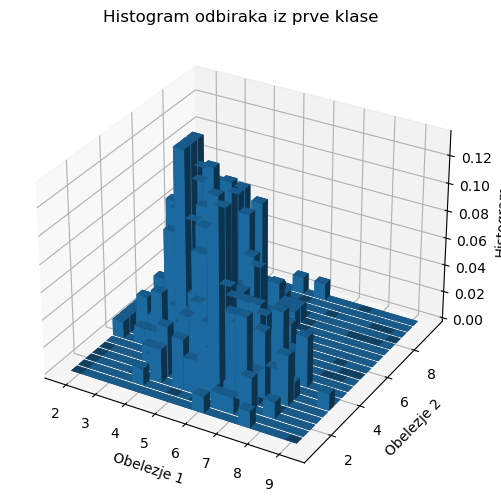

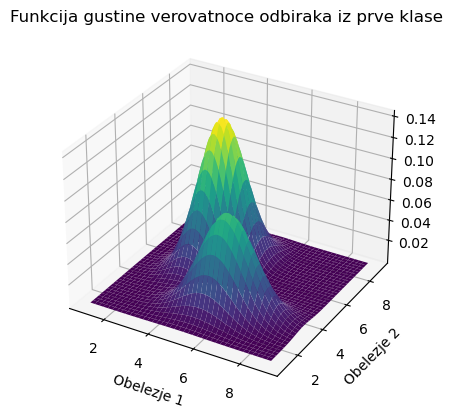

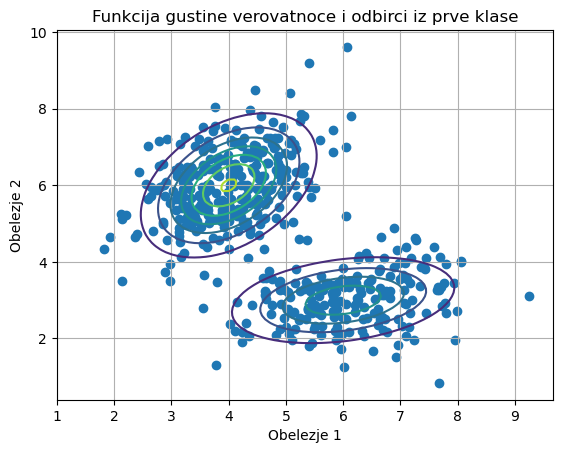

In [148]:
x = np.arange(1,9.1,0.1)
y = np.arange(1,9.1,0.1)

f11 = np.zeros((len(x),len(y)))
f12 = np.zeros((len(x),len(y)))

f1 = np.zeros((len(x),len(y)))

for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(-1,1)
        f11[i,j] = gaussian_pdf(X,M11,S11)
        f12[i,j] = gaussian_pdf(X,M12,S12)
        
        f1[i,j] = p11*f11[i,j] + p12*f12[i,j]

        
X, Y = np.meshgrid(x,y)

hist, x_edges, y_edges = np.histogram2d(data1[:,0], data1[:,1], bins=20, density=True)

x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

dx = dy = (x_edges[1] - x_edges[0])  # Dimenzija binova
dz = hist.ravel()  # Broj podataka u svakom binu

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)
ax.set_xlabel("Obelezje 1")
ax.set_ylabel("Obelezje 2")
ax.set_zlabel("Histogram")
ax.set_title("Histogram odbiraka iz prve klase")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f1.T,cmap='viridis')
ax.set_xlabel('Obelezje 1')
ax.set_ylabel('Obelezje 2')
ax.set_title('Funkcija gustine verovatnoce odbiraka iz prve klase')
plt.show()

plt.figure()
plt.contour(X,Y,f1.T)
plt.scatter(data1[:, 0], data1[:, 1], label="Ω1")
plt.xlabel('Obelezje 1'); plt.ylabel('Obelezje 2')
plt.title('Funkcija gustine verovatnoce i odbirci iz prve klase')
plt.grid()
plt.show()


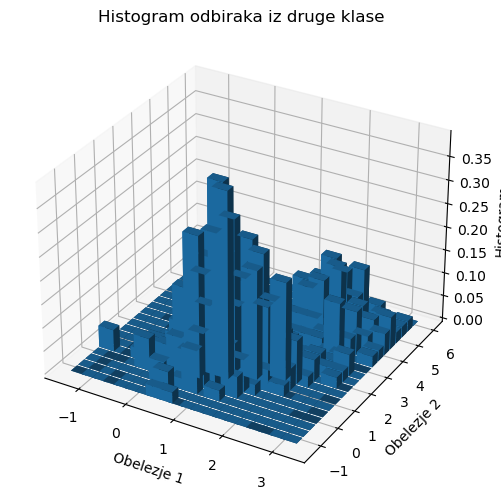

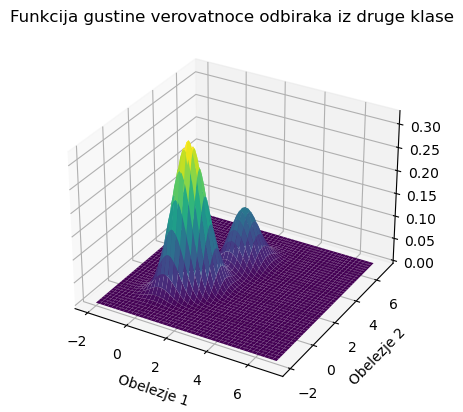

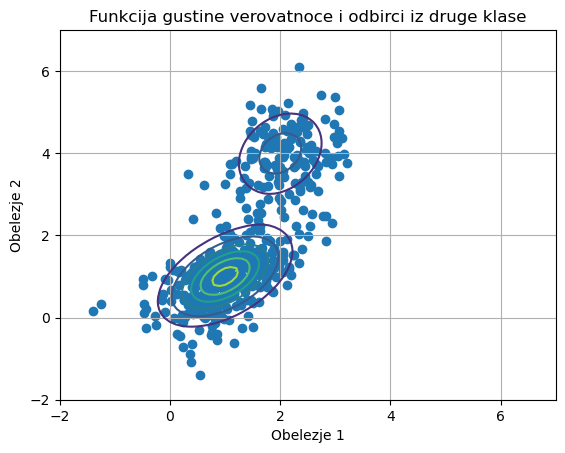

In [126]:
x = np.arange(-2,7.1,0.1)
y = np.arange(-2,7.1,0.1)
f21 = np.zeros((len(x),len(y)))
f22 = np.zeros((len(x),len(y)))
f2 = np.zeros((len(x),len(y)))


for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(-1,1)
        f21[i,j] = gaussian_pdf(X,M21,S21)
        f22[i,j] = gaussian_pdf(X,M22,S22)
        
        f2[i,j] = p21*f21[i,j] + p22*f22[i,j]
        
X, Y = np.meshgrid(x,y)

hist, x_edges, y_edges = np.histogram2d(data2[:,0], data2[:,1], bins=20, density=True)

x_pos, y_pos = np.meshgrid(x_edges[:-1], y_edges[:-1], indexing="ij")
x_pos = x_pos.ravel()
y_pos = y_pos.ravel()
z_pos = np.zeros_like(x_pos)

dx = dy = (x_edges[1] - x_edges[0])*1.4
dz = hist.ravel() 


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, shade=True)

ax.set_xlabel("Obelezje 1")
ax.set_ylabel("Obelezje 2")
ax.set_zlabel("Histogram")
ax.set_title("Histogram odbiraka iz druge klase")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,f2.T,cmap='viridis')
ax.set_xlabel('Obelezje 1')
ax.set_ylabel('Obelezje 2')
ax.set_title('Funkcija gustine verovatnoce odbiraka iz druge klase')
plt.show()

plt.figure()
plt.contour(X,Y,f2.T)
plt.scatter(data2[:, 0], data2[:, 1], label="Ω1")
plt.xlabel('Obelezje 1'); plt.ylabel('Obelezje 2')
plt.title('Funkcija gustine verovatnoce i odbirci iz druge klase')
plt.grid()
plt.show()

### Bajesov test minimalne verovatnoce greske

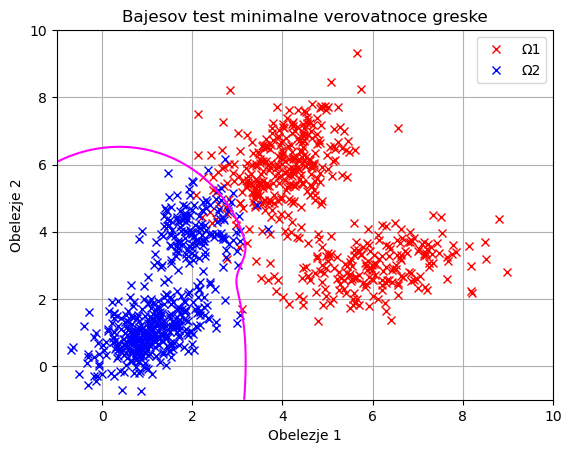

In [160]:
x = np.arange(-1,10,0.05)
y = np.arange(-1,10,0.05)

h = np.zeros((len(x),len(y)))
T = np.log((p11+p12)/(p21+p22))

f11 = np.zeros((len(x),len(y)))
f12 = np.zeros((len(x),len(y)))
f21 = np.zeros((len(x),len(y)))
f22 = np.zeros((len(x),len(y)))
f1 = np.zeros((len(x),len(y)))
f2 = np.zeros((len(x),len(y)))

for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(-1,1)
        
        f11[i,j] = gaussian_pdf(X,M11,S11)
        f12[i,j] = gaussian_pdf(X,M12,S12)
        f21[i,j] = gaussian_pdf(X,M21,S21)
        f22[i,j] = gaussian_pdf(X,M22,S22)
        
        f1[i,j] = p11*f11[i,j] + p12*f12[i,j]
        f2[i,j] = p21*f21[i,j] + p22*f22[i,j]
                
        h[i,j] = -np.log(f1[i,j]/f2[i,j])


Z = h.T < T

plt.figure()
plt.plot(data1[:,0], data1[:,1], 'rx', label='Ω1')  
plt.plot(data2[:,0], data2[:,1], 'bx', label='Ω2') 
plt.contour(x, y, h.T, levels=[T], colors='magenta')
plt.title('Bajesov test minimalne verovatnoce greske')
plt.xlabel('Obelezje 1')
plt.ylabel('Obelezje 2')
plt.xlim([-1,10])
plt.ylim([-1,10])
plt.legend()
plt.grid()
plt.show()

### Greska prve i druge vrste

Vrednosti y_true, y_predict i konfuziona matrica (za lakse racunanje eksperimentalno dobijene greske)

In [161]:
data = np.concatenate((data1,data2),axis=0)
y_true = np.zeros(2*N) 
y_true[N:] = 1
y_predict = np.zeros(np.shape(y_true))

for i in range(0,len(y_true)):
    X = data[i,:].reshape(2,1)
    f11 = gaussian_pdf(X,M11,S11)
    f12 = gaussian_pdf(X,M12,S12)
    f21 = gaussian_pdf(X,M21,S21)
    f22 = gaussian_pdf(X,M22,S22)
        
    f1_i = p11*f11 + p12*f12
    f2_i = p21*f21 + p22*f22
                
    h = -np.log(f1_i/f2_i)
    y_predict[i] = h>T
    
cm = confusion_matrix(y_true,y_predict)

Eksperimentalno dobijena greska

In [162]:
eps1 = cm[0,1]/sum(cm[0,:]) 
eps2 = cm[1,0]/sum(cm[1,:])
print('Greška prve vrste (eksperimentalno): ', eps1)
print('Greška druge vrste (eksperimentalno): ', eps2)

Greška prve vrste (eksperimentalno):  0.03
Greška druge vrste (eksperimentalno):  0.018


Teorijski dobijena greska

In [163]:
e1 = 0
e2 = 0
for i in range(0,len(x)):
    for j in range(0,len(y)):
        if -np.log(f1[i,j]/f2[i,j]) < 0:
            e2 += f2[i,j]*0.05*0.05
        else:
            e1 += f1[i,j]*0.05*0.05
            
print('Greška prve vrste (teorijski): ', e1)
print('Greška druge vrste (teorijski): ', e2) 

Greška prve vrste (teorijski):  0.0246234231098806
Greška druge vrste (teorijski):  0.018019238284994892


### Bajesov test minimalne cene

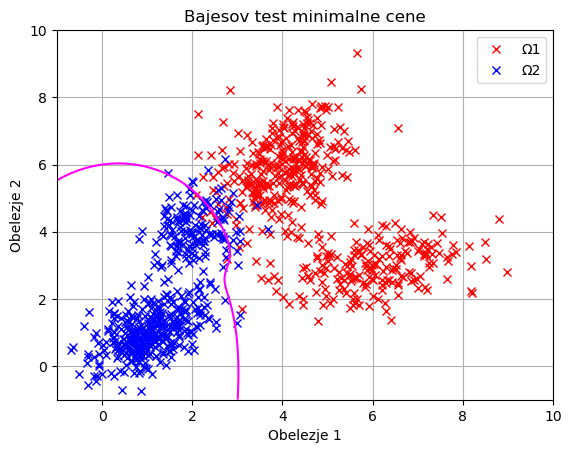

In [164]:
c11 = 0
c22 = 0
c12 = 1
c21 = 5
T = np.log((p11+p12)/(p21+p22)*(c21-c11)/(c12-c22))

x = np.arange(-1,10,0.05)
y = np.arange(-1,10,0.05)

h = np.zeros((len(x),len(y)))

f11 = np.zeros((len(x),len(y)))
f12 = np.zeros((len(x),len(y)))
f21 = np.zeros((len(x),len(y)))
f22 = np.zeros((len(x),len(y)))
f1 = np.zeros((len(x),len(y)))
f2 = np.zeros((len(x),len(y)))

for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(2,1)
        f11[i,j] = gaussian_pdf(X,M11,S11)
        f12[i,j] = gaussian_pdf(X,M12,S12)
        f21[i,j] = gaussian_pdf(X,M21,S21)
        f22[i,j] = gaussian_pdf(X,M22,S22)
        
        f1[i,j] = p11*f11[i,j] + p12*f12[i,j]
        f2[i,j] = p21*f21[i,j] + p22*f22[i,j]
                
        h[i,j] = -np.log(f1[i,j]/f2[i,j])


Z = h.T < T

plt.figure()
plt.plot(data1[:,0], data1[:,1], 'rx', label='Ω1')  
plt.plot(data2[:,0], data2[:,1], 'bx', label='Ω2') 
plt.contour(x, y, h.T, levels=[T], colors='magenta')
plt.title('Bajesov test minimalne cene')
plt.xlabel('Obelezje 1')
plt.ylabel('Obelezje 2')
plt.grid()
plt.xlim([-1,10])
plt.ylim([-1,10])
plt.legend()
plt.show()

### Neyman-Pearson test

Testiramo za koju vrednost parametra $\mu$ ostvarujemo odredjeno eps2

[]

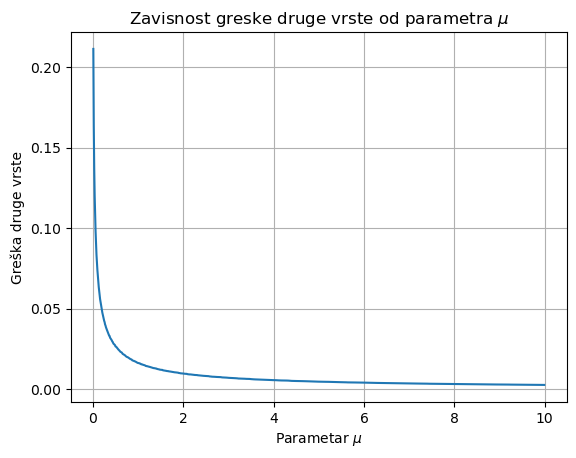

In [166]:
x = np.arange(-1,10,0.05)
y = np.arange(-1,10,0.05)

f11 = np.zeros((len(x),len(y)))
f12 = np.zeros((len(x),len(y)))
f21 = np.zeros((len(x),len(y)))
f22 = np.zeros((len(x),len(y)))
f1 = np.zeros((len(x),len(y)))
f2 = np.zeros((len(x),len(y)))

h = np.zeros((len(x),len(y)))
for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(2,1)
        f11[i,j] = gaussian_pdf(X,M11,S11)
        f12[i,j] = gaussian_pdf(X,M12,S12)
        f21[i,j] = gaussian_pdf(X,M21,S21)
        f22[i,j] = gaussian_pdf(X,M22,S22)

        f1[i,j] = p11*f11[i,j] + p12*f12[i,j]
        f2[i,j] = p21*f21[i,j] + p22*f22[i,j]

        h[i,j] = -np.log(f1[i,j]/f2[i,j])

br = 0
mu = np.arange(0.01,10,0.01)
eps2 = np.zeros(len(mu))
for m in range(0,len(mu)):
    for i in range(0,len(x)-1):
        for j in range(0,len(y)-1):
            if h[i,j]<-np.log(mu[m]):
                eps2[m] = eps2[m] + 0.05*0.05*(f2[i,j]+f2[i+1,j]+f2[i,j+1]+f2[i+1,j+1])/4
            
plt.figure()
plt.plot(mu,eps2)
plt.xlabel('Parametar $\mu$')
plt.ylabel('Greška druge vrste')
plt.title('Zavisnost greske druge vrste od parametra $\mu$')
plt.grid()
plt.plot()


Parametar $\mu$ biramo tako da je eps2=eps0 priblizno jednako eps2+eps1 iz Bajesovog testa minimalne verovatnoce greske (za tu vrednost ce eps1 novo biti minimalno moguce). Ispostavlja se da je to za vrednost $\mu$ = 0.06

In [177]:
print("mu:",mu[18])
print("epsilon:",eps2[18])
mu_opt = mu[18]

mu: 0.19
epsilon: 0.050336548615868656


Prikaz klasifikacije sa novim pragom T, dobijenim kao T=-ln($\mu$)

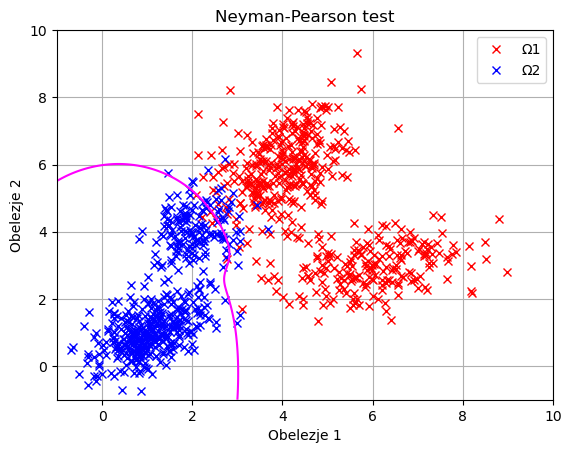

In [179]:
T = -np.log(mu_opt)

x = np.arange(-1,10,0.05)
y = np.arange(-1,10,0.05)

h = np.zeros((len(x),len(y)))

f11 = np.zeros((len(x),len(y)))
f12 = np.zeros((len(x),len(y)))
f21 = np.zeros((len(x),len(y)))
f22 = np.zeros((len(x),len(y)))
f1 = np.zeros((len(x),len(y)))
f2 = np.zeros((len(x),len(y)))

for i in range(0,len(x)):
    for j in range(0,len(y)):
        X = np.array([x[i],y[j]]).reshape(2,1)
        f11[i,j] = gaussian_pdf(X,M11,S11)
        f12[i,j] = gaussian_pdf(X,M12,S12)
        f21[i,j] = gaussian_pdf(X,M21,S21)
        f22[i,j] = gaussian_pdf(X,M22,S22)
        
        f1[i,j] = p11*f11[i,j] + p12*f12[i,j]
        f2[i,j] = p21*f21[i,j] + p22*f22[i,j]
                
        h[i,j] = -np.log(f1[i,j]/f2[i,j])


Z = h.T < T

plt.figure()
plt.plot(data1[:,0], data1[:,1], 'rx', label='Ω1')  
plt.plot(data2[:,0], data2[:,1], 'bx', label='Ω2') 
plt.contour(x, y, h.T, levels=[T], colors='magenta')
plt.title('Neyman-Pearson test')
plt.xlabel('Obelezje 1')
plt.ylabel('Obelezje 2')
plt.legend()
plt.xlim([-1,10])
plt.ylim([-1,10])
plt.grid()
plt.show()

### Wald-ov sekvencijalni test

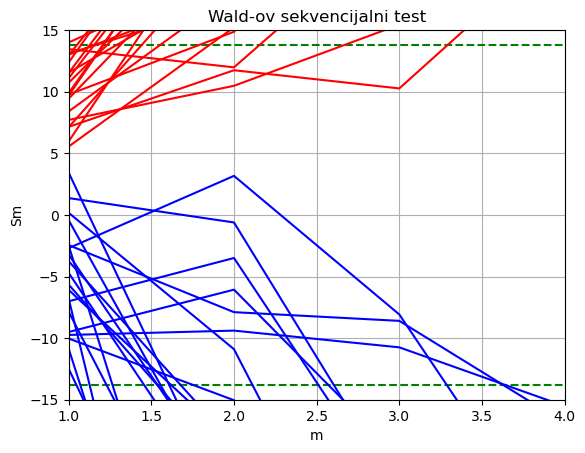

In [181]:
#Zadajemo zeljene greske
e1 = 0.000001
e2 = 0.000001
#Na osnovu njih dobijamo a i b
a = -np.log((1 - e1) / e2)
b = -np.log(e1 / (1 - e2))

num_iter = 100
#Inicijalizacija matrica u kojima cuvamo vrednosti Sm i nizova m u kome pamtimo u kom koraku iteraicije se zaustavljamo
Sm1_mat = np.zeros((num_iter, N))
m1 = np.zeros((num_iter, 1))
Sm2_mat = np.zeros((num_iter, N))
m2 = np.zeros((num_iter, 1))

#Iterativni postupak
for i in range(num_iter):
    r = np.random.permutation(N)
    Sm1 = 0
    Sm2 = 0
    kraj1 = 0
    kraj2 = 0
    
    #Valdov test za podatke iz prve klase
    for j in range(N):
        X1 = data1[r[j],:].reshape(2,1)
        f11 = gaussian_pdf(X1,M11,S11)
        f12 = gaussian_pdf(X1,M12,S12)
        f1 = p11 * f11 + p12 * f12
        
        f21 = gaussian_pdf(X1,M21,S21)
        f22 = gaussian_pdf(X1,M22,S22)
        f2 = p21 * f21 + p22 * f22
        
        #Dodajemo vrednost h u Sm
        Sm1 -= np.log(f1 / f2)
        
        Sm1_mat[i, j] = Sm1
        #Provera da li se zaustavljamo
        if (Sm1 > b or Sm1 < a) and kraj1 == 0:
            kraj1 = 1
            m_1[i] = j
    
    #Valdov test za podatke iz druge klase
    for j in range(N):
        X2 = data2[r[j],:].reshape(2,1)
        f11 = gaussian_pdf(X2,M11,S11)
        f12 = gaussian_pdf(X2,M12,S12)
        f1 = p11 * f11 + p12 * f12
        
        f21 = gaussian_pdf(X2,M21,S21)
        f22 = gaussian_pdf(X2,M22,S22)
        f2 = p21 * f21 + p22 * f22
        
        Sm2 -= np.log(f1 / f2)
        
        Sm2_mat[i, j] = Sm2
        if (Sm2 > b or Sm2 < a) and kraj2 == 0:
            kraj2 = 1
            m_2[i] = j

# Prikaz rezultata
m = int(max(np.max(m_1), np.max(m_2)))
plt.figure()
#Granice odlucivanja
plt.plot(range(1, m+1), a * np.ones(m), '--g')
plt.plot(range(1, m+1), b * np.ones(m), '--g')
plt.ylim([-15, 15])
plt.xlim([1, m])
for i in range(25):
    plt.plot(range(1, m+1), Sm_1[i, :m], 'b')
    plt.plot(range(1, m+1), Sm_2[i, :m], 'r')
plt.xlabel('m')
plt.ylabel('Sm')
plt.grid()
plt.title('Wald-ov sekvencijalni test')
plt.show()

Ispitivanje potrebnog broja odbiraka u zavisnosti od verovatnoce greske prvog i drugog tipa

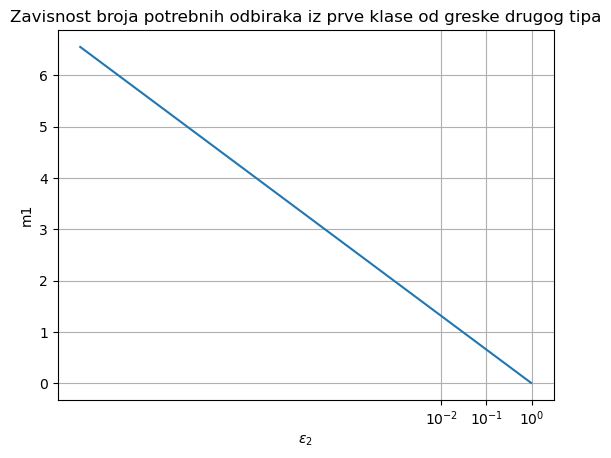

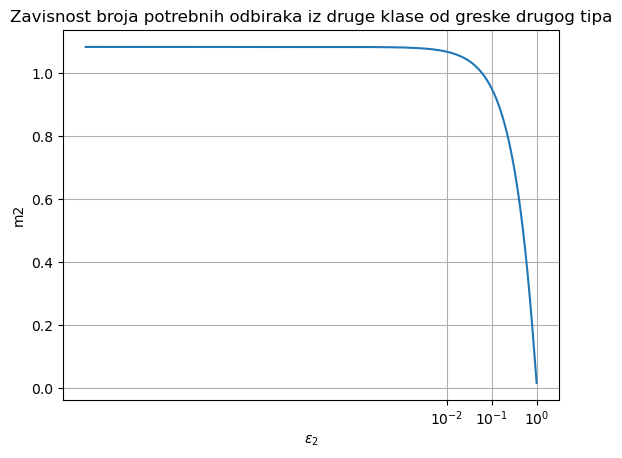

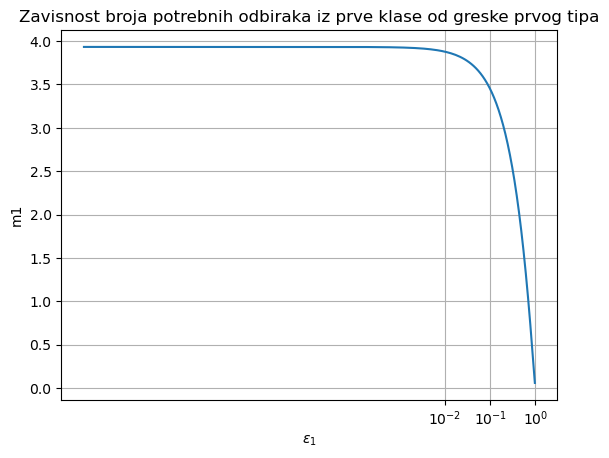

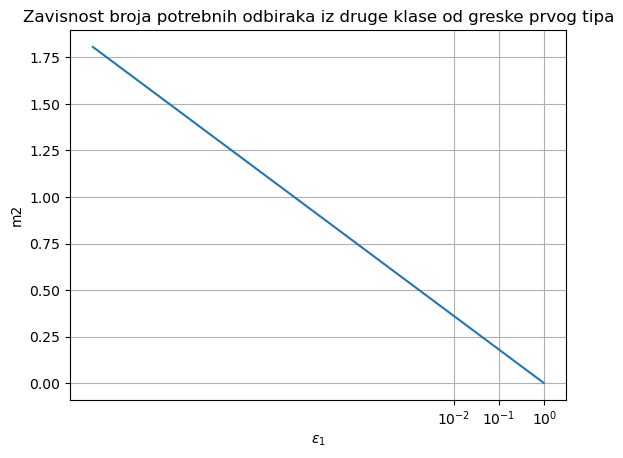

In [144]:
#Broj obelezja
iN = 2 
#Srednje vrednosti
ni1 = 0
ni2 = 0

for j in range(iN):
    X1 = data1[j,:].reshape(2,1)
    f11 = gaussian_pdf(X1,M11,S11)
    f12 = gaussian_pdf(X1,M12,S12)
    f1 = p11 * f11 + p12 * f12
    
    f21 = gaussian_pdf(X1,M21,S21)
    f22 = gaussian_pdf(X1,M22,S22)
    f2 = p21 * f21 + p22 * f22
    
    ni1 -= np.log(f1 / f2) / iN
    
    X2 = data2[j,:].reshape(2,1)
    f11 = gaussian_pdf(X2,M11,S11)
    f12 = gaussian_pdf(X2,M12,S12)
    f1 = p11 * f11 + p12 * f12
    
    f21 = gaussian_pdf(X2,M21,S21)
    f22 = gaussian_pdf(X2,M22,S22)
    f2 = p21 * f21 + p22 * f22
    
    ni2 -= np.log(f1 / f2) / iN
    

#Potreban broj odbiraka u zavisnosti od greske drugog tipa
eps1 = 0.000001
eps2 = np.logspace(-10, -0.01, 200)

m1 = (-np.log((1 - eps1) / eps2) * (1 - eps1) - np.log(eps1 / (1 - eps2)) * eps1) / ni1
m2 = (-np.log(eps1 / (1 - eps2)) * (1 - eps2) - np.log((1 - eps1) / eps2) * eps2) / ni2
m1 = m1.reshape(-1,1)
m2 = m2.reshape(-1,1)
plt.figure()
plt.semilogx(eps2, m1)
plt.xlabel('$\epsilon_2$')
plt.ylabel('m1')
plt.xticks([10 ** -2, 10 ** -1, 10 ** 0])
plt.title('Zavisnost broja potrebnih odbiraka iz prve klase od greske drugog tipa')
plt.grid()
plt.show()

plt.figure()
plt.semilogx(eps2, m2)
plt.xlabel('$\epsilon_2$')
plt.ylabel('m2')
plt.xticks([10 ** -2, 10 ** -1, 10 ** 0])
plt.title('Zavisnost broja potrebnih odbiraka iz druge klase od greske drugog tipa')
plt.grid()
plt.show()

#Potreban broj odbiraka u zavisnosti od greske prvog tipa
eps2 = 0.000001
eps1 = np.logspace(-10, -0.01, 200)

m1 = (-np.log((1 - eps1) / eps2) * (1 - eps1) - np.log(eps1 / (1 - eps2)) * eps1) / ni1
m2 = (-np.log(eps1 / (1 - eps2)) * (1 - eps2) - np.log((1 - eps1) / eps2) * eps2) / ni2
m1 = m1.reshape(-1,1)
m2 = m2.reshape(-1,1)

plt.figure()
plt.semilogx(eps1, m1)
plt.xlabel('$\epsilon_1$')
plt.ylabel('m1')
plt.xticks([10 ** -2, 10 ** -1, 10 ** 0])
plt.title('Zavisnost broja potrebnih odbiraka iz prve klase od greske prvog tipa')
plt.grid()
plt.show()

plt.figure()
plt.semilogx(eps1, m2)
plt.xlabel('$\epsilon_1$')
plt.ylabel('m2')
plt.xticks([10 ** -2, 10 ** -1, 10 ** 0])
plt.title('Zavisnost broja potrebnih odbiraka iz druge klase od greske prvog tipa')
plt.grid()
plt.show()
